# Exploratory Data Analysis
### Kwame V. Taylor

## Set up Environment

In [26]:
import pandas as pd
import numpy as np

from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib as mpl
import seaborn as sns
from cycler import cycler

# default viz size settings
plt.rc('figure', figsize=(11, 8))
plt.rc('font', size=15)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['axes.prop_cycle'] = cycler(color=['deepskyblue', 'firebrick', 'darkseagreen', 'violet'])

In [15]:
from prepare import handle_nulls
from preprocessing import split_df

## Acquire data

In [16]:
df = pd.read_csv('full_playlist_offset.csv', index_col=0)

In [17]:
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date,explicit,popularity
0,Tay-K,TRAPMAN,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2,-8.544,1,0.3000,0.000000,0.244,0.351,82.512,232803,4,2020-07-12,True,43.0
1,Lil Wyte,Doubt Me Now,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9,-6.912,1,0.2330,0.000000,0.114,0.265,148.077,193920,4,2003-03-04,True,61.0
2,Kamelen,KINGPIN SLIM,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,0.649,0.798,0,-6.450,0,0.1450,0.000000,0.409,0.717,160.011,254390,4,2019-11-29,True,22.0
3,Waka Flocka Flame,Flockaveli,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0,-4.783,0,0.1080,0.000000,0.364,0.771,140.059,250493,4,2010-10-01,True,62.0
4,Project Pat,Mista Don't Play: Everythangs Workin',Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,0.838,0.793,11,-5.470,0,0.0773,0.000001,0.106,0.800,160.003,261933,4,2001-02-13,True,45.0


In [18]:
df.shape

(700, 19)

## Prepare data

In [6]:
# handle null values
df = handle_nulls(df)

# split the data
train, validate, test = split_df(df)
train.head()

train shape:  (70, 19) , validate shape:  (20, 19) , test shape:  (10, 19)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date,explicit,popularity
25,Various Artists,The Crunk Recordings: Hits From The Pioneers A...,No Problem,0EgigrGFGb4PHaVNb7fgK7,0.858,0.731,1,-7.224,1,0.2370,0.0,0.150,0.1390,85.984,214213,4,2009-08-21,True,55.0
26,Nelly,Nelly Party Anthems,Grillz,6zS6zUoWh8QluIZ2lv9tWb,0.865,0.514,4,-7.251,0,0.2410,0.0,0.255,0.8220,82.987,271240,4,2020-06-26,True,58.0
82,DJ Khaled,We Global,Go Hard,6stxKQ2M28z3YYHxVnyTVv,0.640,0.883,5,-4.011,0,0.0497,0.0,0.488,0.3790,130.005,272093,4,2008-09-16,True,8.0
56,Tay-K,#SantanaWorld (+),Megaman,6ikgPqC9vhkduTdIpsqYdj,0.744,0.314,8,-8.871,1,0.0864,0.0,0.134,0.0438,134.388,133000,4,2017-12-14,True,59.0
98,T-Pain,Epiphany,Bartender,5kxddRG1RZaZROadk7iC4D,0.675,0.394,8,-8.539,1,0.1330,0.0,0.214,0.4050,104.987,238800,4,2007-06-05,True,69.0


In [7]:
df.columns

Index(['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'release_date', 'explicit', 'popularity'],
      dtype='object')

# Does a track being explicit or not correlate with its popularity?

### Swarm plot

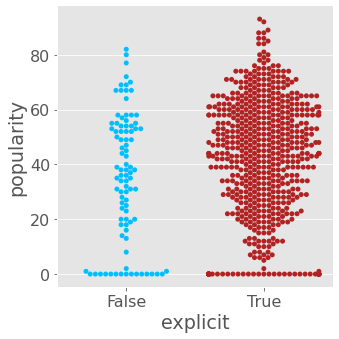

In [20]:
sns.catplot(x="explicit", y="popularity", kind="swarm", data=df)

### Independent T-Test

The features are independent because there is no overlap between observations in explicit and observations in not explicit.

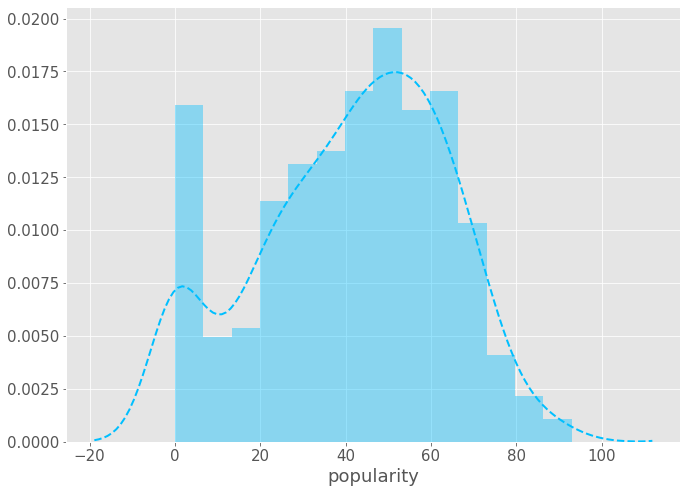

In [27]:
# check for normal distribution
sns.distplot(df.popularity)

In [31]:
df.explicit.value_counts()

True     607
False     93
Name: explicit, dtype: int64

In [32]:
# compare variances
explicit_sample = df[df.explicit==True].popularity
not_explicit_sample = df[df.explicit==False].popularity

print(explicit_sample.var())
print(not_explicit_sample.var())

470.9400231621187
550.5780738662927


No, so we will set the argument of equal_var to False.

**Set hypothesis and alpha:**

$H_{0}$: Mean of song popularity of explicit tracks = Mean of song popularity of non-explicit tracks

$H_{a}$: Mean of song popularity of explicit tracks > Mean of song popularity of non-explicit tracks

$\alpha$: .05

In [34]:
alpha = .05

**Compute test statistic and probability (t-statistic & p-value)**

In [35]:
t, p = stats.ttest_ind(explicit_sample, not_explicit_sample, equal_var = False)

print('Test statistic:', t, '\n', p/2, '\n', alpha)

Test statistic: 2.656632970670158 
 0.0044953248689709145 
 0.05


**Decide**

In [37]:
null_hypothesis = "there is no significant difference between the mean popularity of explicit tracks and non-explicit tracks."

if p/2 < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis.")

We reject the hypothesis that there is no significant difference between the mean popularity of explicit tracks and non-explicit tracks.


In [39]:
not_explicit_sample.mean(), explicit_sample.mean()

(35.473118279569896, 42.34761120263592)

Now put it in a function:

In [ ]:
def explicit_viz(df):
    

def explicit_ttest(df)

# Does loudness have a relationship with popularity?